In [1]:
# importing necessary libararies

from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold,RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
import xgboost as xgb
from sklearn.svm import SVR
from matplotlib import pyplot
import seaborn as sns

C:\Users\PSEN\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Building a dataset using the make_regression libarary

In [2]:


def dataset():
	x, y = make_regression(n_samples=1000, n_features=20, n_informative=10, noise=0.1, random_state=1)
	return x, y

x,y=dataset()

print(x.shape)
print(y.shape)

(1000, 20)
(1000,)


## This function will help to build the stacking. We are stacking 5 different machine learning model as base estimator and the linear regression as a final meta learner

In [3]:


def stacking():
    estimators=[
        ('knn',KNeighborsRegressor()),
        ('svm',SVR()),
        ('cart',DecisionTreeRegressor()),
        ('rf',RandomForestRegressor()),
        ('xgb',xgb.XGBRegressor()),
    ]
    stack_model=StackingRegressor(estimators=estimators,final_estimator=LinearRegression())
    return stack_model

## This function will allow to put all the base models along withthe stacked model in one dictionary. So that we can run them and see the performances


In [4]:

def model():
    models = dict()
    models['knn'] = KNeighborsRegressor()
    models['cart'] = DecisionTreeRegressor()
    models['svm'] = SVR()
    models['rf']=RandomForestRegressor()
    models['xgb']=xgb.XGBRegressor()
    models['stacking']=stacking()
    
    return models
    

## Model Evaluation. We are using the negative mean abs error. So the higher the 'neg_mean_abs_error', the better the model performance

In [5]:


def evaluate(model, x,y):
    scores=cross_val_score(model,x,y,scoring='neg_mean_absolute_error',cv=3,n_jobs=1,error_score='raise')
    return scores
    

In [6]:
# get the models to evaluate
models = model()
# evaluate the models and store results
results=list()
names = list()
for name, model in models.items():
	scores = evaluate(model, x, y)
	results.append(scores)
	names.append(name)
	print('%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

knn -74.492 (3.947)
cart -93.053 (1.675)
svm -116.746 (8.858)
rf -57.589 (2.492)
xgb -50.545 (1.953)
stacking -37.749 (1.536)


### From the results, we can see that we got the best mean performance in the stacked model compared to the base ml models. The standard deviation also indicates that there is less variation in the performances in each folds when we use stacking. Decision tree is showing the least amount of variation but the average performance of decision tree is not even close to the stacked learner 

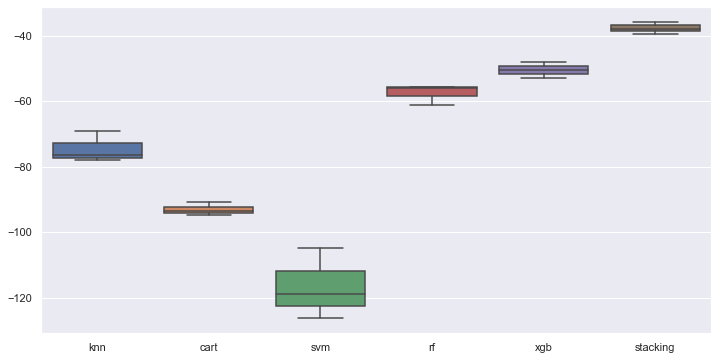

In [7]:

sns.set(rc={'figure.figsize':(12,6)})
sns.boxplot(x=names, y=results)